In [304]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm



In [17]:
A = np.arange(16).reshape(4,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [19]:
B = np.ones((2,2))
B

array([[1., 1.],
       [1., 1.]])

In [22]:
A[1:3, 1:3] = A[1:3, 1:3] + B
A

array([[ 0,  1,  2,  3],
       [ 4,  6,  7,  7],
       [ 8, 10, 11, 11],
       [12, 13, 14, 15]])

In [309]:
def gen_ros():
    background = np.random.random(32*32).reshape((32,32)) * 0.1
    satellite = np.random.random(3*3).reshape((3,3)) * 0.3
    
    x0, y0 = np.random.randint(4, 24, 2)

    background[x0:x0+3, y0:y0+3] = np.clip(background[x0:x0+3,  y0:y0+3] + satellite, 0.2, 0.6)
    background[x0+1,y0+1]=0.8
    
    return background

<IPython.core.display.Javascript object>


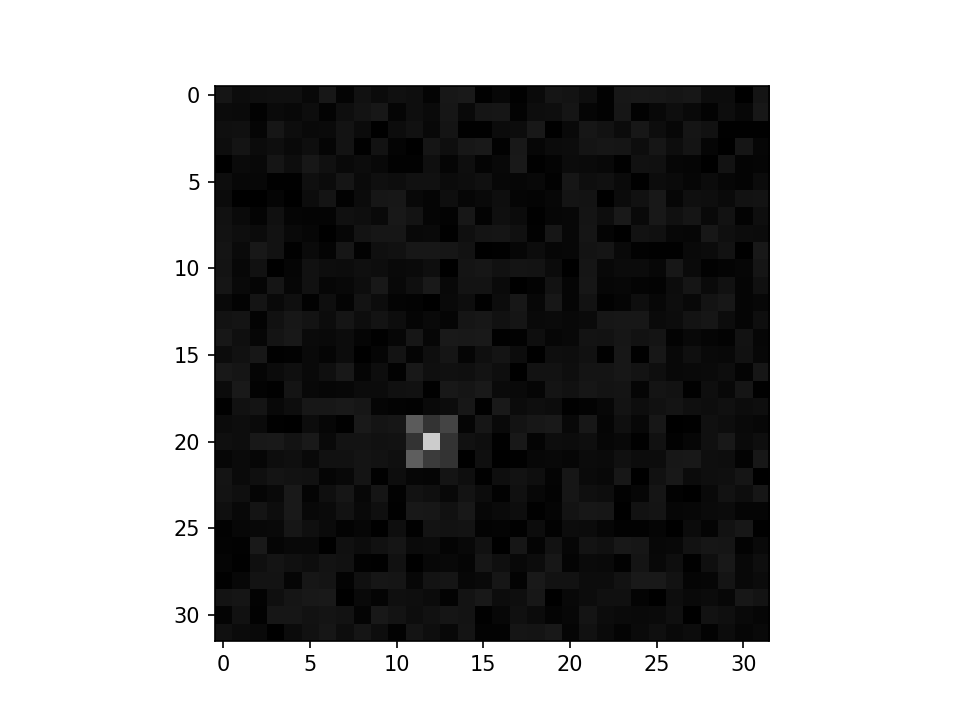

In [310]:
plt.imshow(gen_ros(), cmap='gray', norm=NoNorm())

In [645]:
def gen_blob(min_spread=1, max_spread=5):
    mean = [0, 0]
    spread = np.random.randint(min_spread, max_spread)
    cov = [[spread, 0], [0, spread]]
    X = np.random.multivariate_normal(mean, cov, 1000)
    X = np.round(X).astype(int)
        
    return np.unique(X, axis=0, return_counts=True)


def gen_ros():
    # simulate background
    background = np.random.random(32*32).reshape((32,32)) * 0.1
    
    # Gen blob
    coordinates, values = gen_blob(1, 2)
    values = values / values.max()
    
   # Shift to zero origin and add random offset
    x_offset = np.random.randint(4, 18)
    y_offset = np.random.randint(4, 18)
    coordinates[:,0] -= (coordinates[:,0].min() - x_offset)
    coordinates[:,1] -= (coordinates[:,1].min() - y_offset)
    
    background[coordinates[:,0], coordinates[:,1]] = values 
    
    return background

def gen_ros_explosion():
    # simulate background
    background = np.random.random(32*32).reshape((32,32)) * 0.1
        
    # Gen first blob
    coordinates, values = gen_blob(3, 6)
    values = values / values.max()
    
    # Shift to zero origin and add random offset
    x_offset = np.random.randint(4, 14)
    y_offset = np.random.randint(4, 14)
    coordinates[:,0] -= (coordinates[:,0].min() - x_offset)
    coordinates[:,1] -= (coordinates[:,1].min() - y_offset)
    
    background[coordinates[:,0], coordinates[:,1]] = values 
    
    # Gen second blob
    coordinates, values = gen_blob(2, 4)
    values = values / values.max()
    x_offset += np.random.randint(-3, 3)
    y_offset += np.random.randint(-3, 3)
    coordinates[:,0] -= (coordinates[:,0].min() - x_offset)
    coordinates[:,1] -= (coordinates[:,1].min() - y_offset)
    
    background[coordinates[:,0], coordinates[:,1]] += values 

    return background

<IPython.core.display.Javascript object>


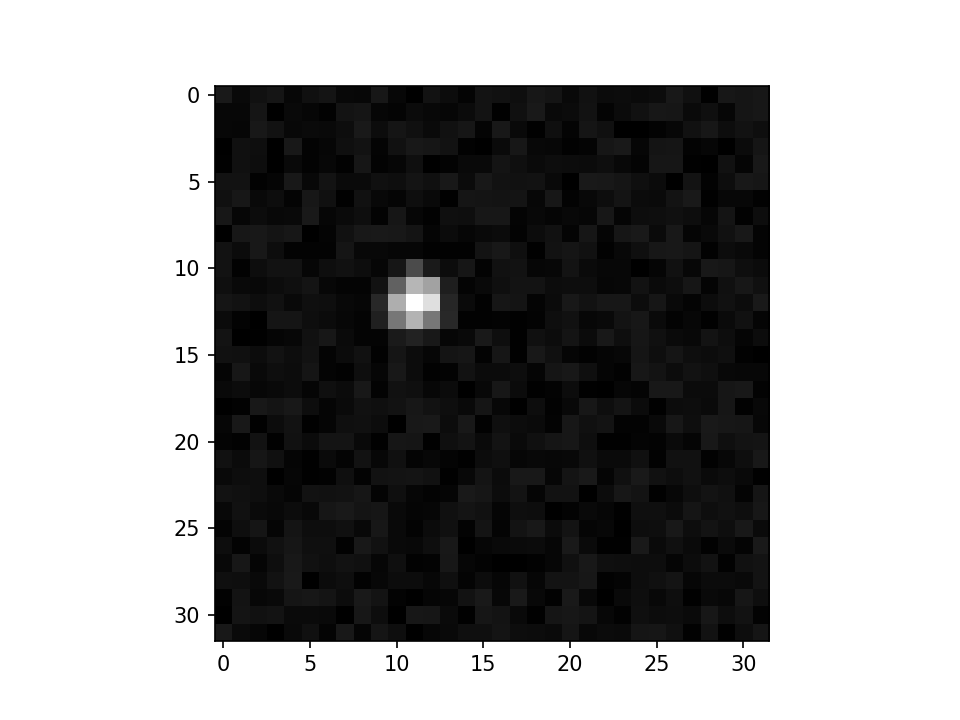

In [659]:
#plt.imshow(gen_ros_explosion(), cmap='gray', norm=NoNorm())
#plt.imshow(gen_ros_explosion(), cmap='gray')

plt.imshow(gen_ros(), cmap='gray', norm=NoNorm())


In [404]:
x2.max()

32

In [301]:
mean = [0, 0]
cov = [[5, 0], [0, 5]]
X = np.random.multivariate_normal(mean, cov, 1000)
X

array([[-0.07566428,  1.49643673],
       [-0.14883106, -1.46272851],
       [-5.56492376, -1.6657757 ],
       ..., 
       [ 5.24926012,  1.89322011],
       [-0.08049457,  2.12055933],
       [-2.76919784, -3.37516824]])

<IPython.core.display.Javascript object>


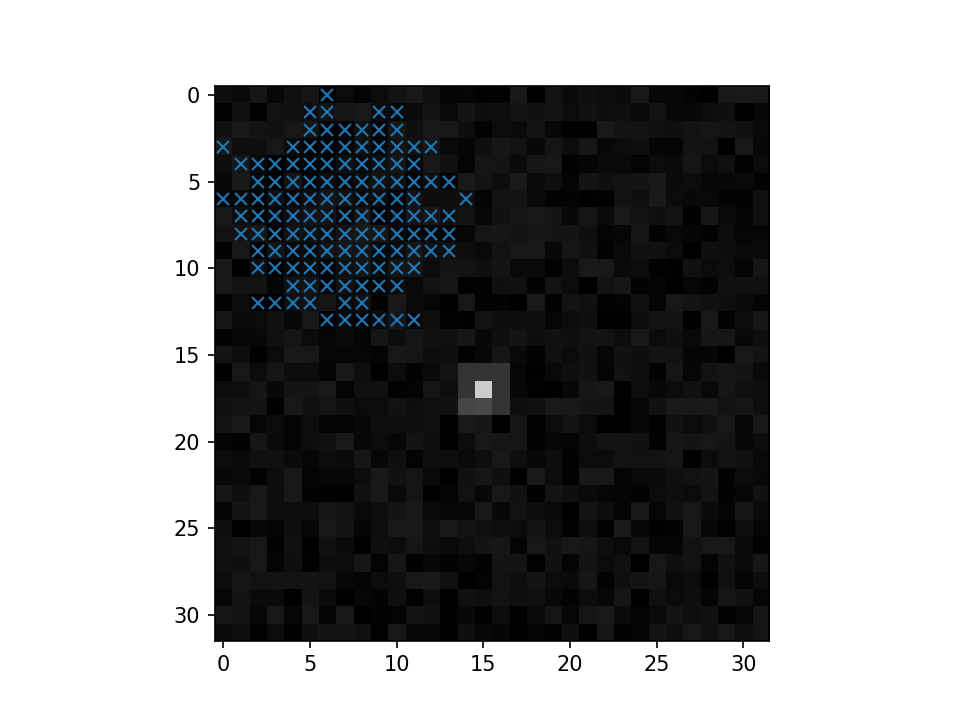

In [300]:
plt.plot(X[:,0], X[:,1], 'x')

In [295]:
X[:,0] -= X[:,0].min()
X[:,0]

array([  0.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   7.,   7.,
         7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,
        11.,  11.,  11.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  14.,  14.,
        14.,  15.,  15.,  15.,  16.,  16.])

In [183]:
plt.imshow(gen_ros_explosion(), cmap='gray', norm=NoNorm())

NameError: name 'gen_ros_explosion' is not defined

In [252]:
X.shape

(2, 1000)

In [242]:
x = np.round(x)
y = np.round(y)
y

array([ 2., -3.,  3., -2.,  2., -3., -2.,  1., -1., -4., -3.,  5.,  5.,
        2., -2., -4.,  5., -4., -1.,  1.,  0., -1., -1.,  2., -1., -1.,
        3.,  3., -4.,  1., -3.,  0., -2., -1.,  0., -4., -3., -5.,  2.,
        3.,  2., -2.,  3., -2.,  0.,  4.,  2., -1.,  3., -2.,  3.,  1.,
       -3.,  0.,  1., -0., -2., -1., -1., -1., -1., -1.,  1., -5., -1.,
        0.,  0.,  4., -3., -2., -1., -2.,  3., -1.,  0., -3., -0.,  4.,
        4.,  0.,  1.,  0.,  3., -0., -3., -2.,  2., -2.,  1., -4.,  1.,
        0.,  1.,  1., -1.,  0.,  0.,  0., -3.,  0., -1.,  1.,  1.,  0.,
       -2., -1.,  0.,  2.,  2., -2.,  0., -5., -1., -1., -3.,  4., -5.,
        2.,  1.,  3., -2., -1., -3.,  2.,  4., -1., -1., -4.,  3.,  2.,
       -0.,  1., -2., -2., -5.,  2., -3., -4., -2.,  1., -5., -4.,  0.,
       -1.,  0.,  2., -1., -1., -4., -1.,  1.,  1., -1.,  0.,  0., -1.,
        0., -1., -2., -1.,  1.,  4.,  2.,  1., -1., -2., -1.,  2., -2.,
        1.,  3.,  0.,  2.,  3.,  4.,  1.,  4.,  2., -3., -1.,  3

In [215]:
explosion = np.random.triangular(0.1, 0.5, 0.8, size=(10, 10))

<IPython.core.display.Javascript object>


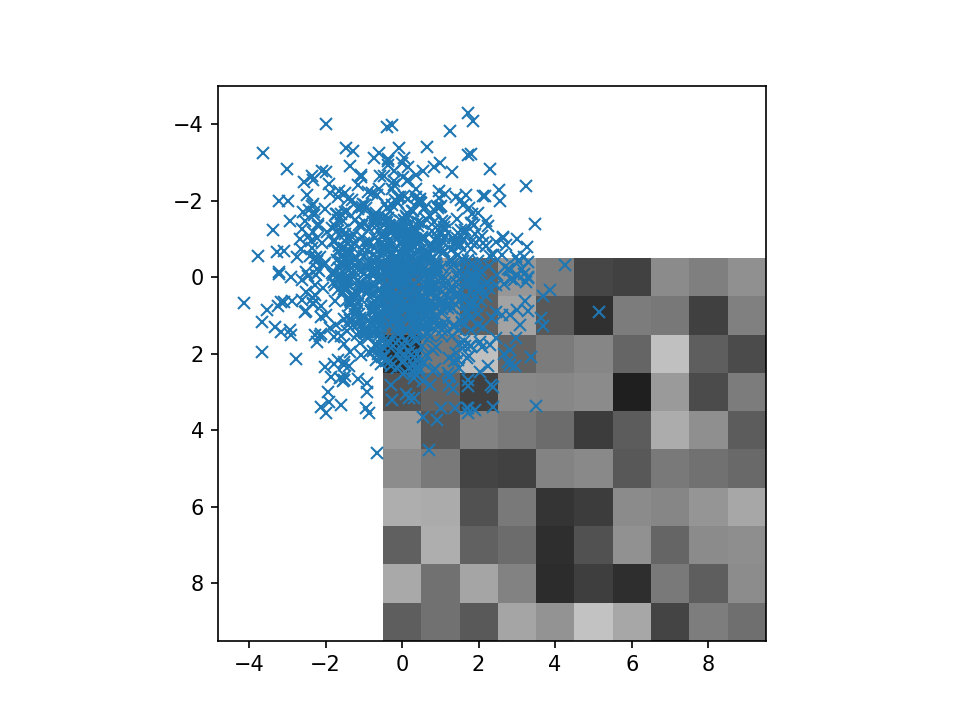

In [216]:
plt.imshow(explosion, cmap='gray', norm=NoNorm())

In [246]:
ar = np.array([1,1,1,2,2,3,3,3,3,4])
ar

array([1, 1, 1, 2, 2, 3, 3, 3, 3, 4])

In [247]:
ar.shape

(10,)

In [249]:
np.unique(ar, return_counts=True)

(array([1, 2, 3, 4]), array([3, 2, 4, 1]))

In [269]:
mean = [0, 0]
cov = [[5, 0], [0, 5]]
X = np.random.multivariate_normal(mean, cov, 1000)
X = np.round(X)
X

array([[ 0., -4.],
       [ 1.,  3.],
       [-1.,  6.],
       ..., 
       [-2.,  1.],
       [ 4.,  1.],
       [ 1.,  4.]])

In [273]:
X[:,0]

array([ 0.,  1., -1.,  2.,  2.,  1.,  4.,  0.,  2., -2., -1.,  4.,  0.,
       -1., -0., -1., -1., -1.,  4., -2., -1.,  1., -1., -2., -5.,  0.,
        3., -0., -2.,  1.,  3., -1.,  1., -1., -6.,  4.,  2., -2.,  1.,
        2.,  1., -1., -0., -2.,  1.,  2.,  4., -1.,  4.,  3., -2.,  1.,
        1.,  2., -1., -2.,  1., -4.,  4.,  1., -0., -2., -0.,  0., -2.,
        1.,  3.,  4.,  4., -1., -2.,  1.,  3.,  0.,  4.,  0., -3., -1.,
        0.,  0.,  2., -1., -2.,  0.,  1.,  1.,  2.,  1., -3.,  0., -0.,
       -2.,  5.,  3.,  2., -0.,  3., -0., -1., -1.,  1.,  0.,  3., -0.,
        3., -1.,  2.,  2., -6.,  4.,  1.,  3.,  1., -1., -3., -1., -2.,
       -4.,  1.,  4.,  2.,  1., -1.,  1.,  3., -3.,  2.,  3., -3.,  1.,
       -1.,  1.,  2., -2., -0., -2., -1.,  1., -3.,  2.,  5., -1., -1.,
       -0.,  1.,  3., -1.,  1., -1., -2., -1., -0.,  0.,  0.,  4.,  2.,
       -2., -3., -3.,  3., -1.,  3., -1., -1.,  2., -1.,  3., -4.,  6.,
       -1.,  1.,  4.,  0.,  3.,  2., -1., -1.,  1., -1., -1.,  3

In [280]:
X

array([[ 0., -4.],
       [ 1.,  3.],
       [-1.,  6.],
       ..., 
       [-2.,  1.],
       [ 4.,  1.],
       [ 1.,  4.]])

In [282]:
np.unique(X, axis=0, return_counts=True)

(array([[-7., -0.],
        [-6., -1.],
        [-6.,  0.],
        [-5., -4.],
        [-5., -3.],
        [-5., -2.],
        [-5., -1.],
        [-5., -0.],
        [-5.,  1.],
        [-5.,  2.],
        [-4., -4.],
        [-4., -3.],
        [-4., -2.],
        [-4., -1.],
        [-4.,  0.],
        [-4.,  1.],
        [-4.,  2.],
        [-4.,  3.],
        [-4.,  4.],
        [-3., -6.],
        [-3., -4.],
        [-3., -3.],
        [-3., -2.],
        [-3., -1.],
        [-3., -0.],
        [-3.,  1.],
        [-3.,  2.],
        [-3.,  3.],
        [-3.,  4.],
        [-2., -7.],
        [-2., -6.],
        [-2., -4.],
        [-2., -3.],
        [-2., -2.],
        [-2., -1.],
        [-2.,  0.],
        [-2.,  1.],
        [-2.,  2.],
        [-2.,  3.],
        [-2.,  4.],
        [-2.,  5.],
        [-1., -6.],
        [-1., -5.],
        [-1., -4.],
        [-1., -3.],
        [-1., -2.],
        [-1., -1.],
        [-1.,  0.],
        [-1.,  1.],
        [-1.,  2.],


In [262]:
X.shape

(2, 1000)

In [267]:
XT = np.transpose(X)
XT

array([[ 0.,  1.],
       [-1., -2.],
       [ 1., -0.],
       ..., 
       [ 1., -0.],
       [-3., -1.],
       [-3.,  3.]])

In [268]:
XT.shape

(1000, 2)